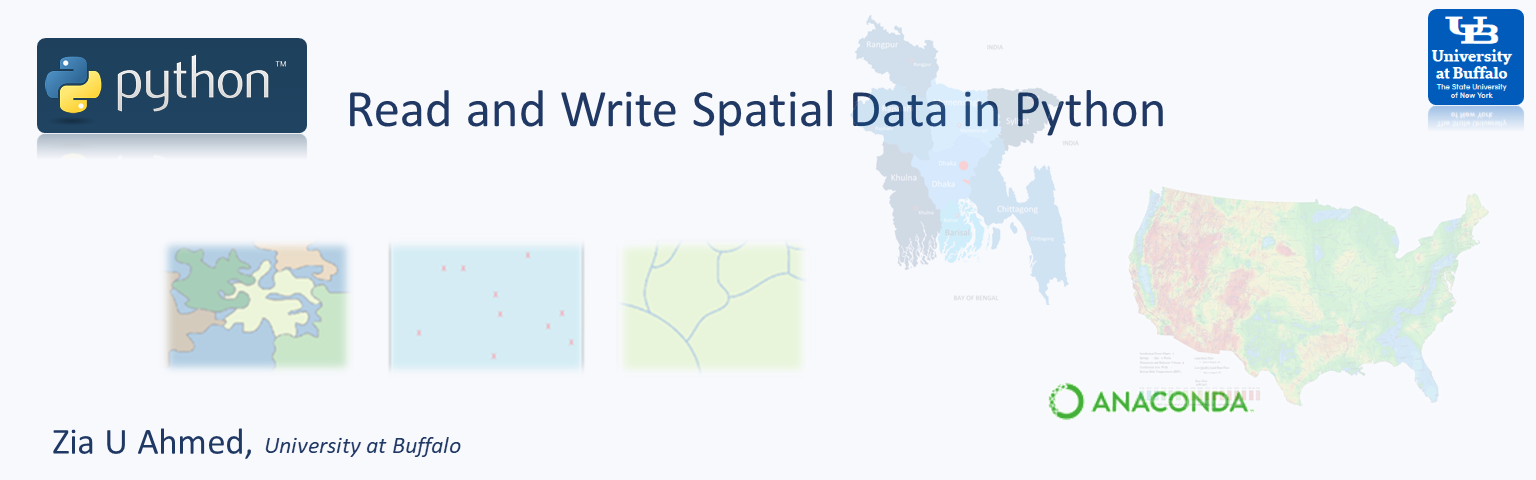

In this exercise, you will learn how to read and write following types of spatial data in Python.


* [Vector Data](#Vector-Data)

    - [Polygon data](#Polygon-data)
    
    - [Lines or Polylines](#Lines-or-Polylines)
    
    - [Point data](#Point-data)
    

    
* [Raster Data](#Raster-Data)

    - [Single Band Raster](#Single-Band-Raster)
    
    - [Multi Band Raster](#Multi-Band-Raster)
         
    - [Stack Multi Band Imagery](#Stack-Multi-Band-Imagery)


We will use following data set and could be found [here](https://www.dropbox.com/s/kzd5dx2pchaerzr/Data_02.7z?dl=0).  

* New York State county shape file (Polygon: NY_County_GCS) 
* Soil Carbon Data (SOC) from Colorado, Kansas, New Mexico, and Wyoming (Point: GP_SOC_GCS.shp) 
* Road network maps of Onondaga county, New York State (polyline: "Onondaga_Street_GCS.shp) 
* 90 m SRTM DEM of Onondaga county, New York State (raster: Onondaga_DEM.tif) 
* Landsat8 multibands Images

###  Set working directory

In [2]:
import os
path= "C:/Users/zahmed2/Documents/spatial_data_processing_and_analysis_python/Lesson_02_read_and_write_spatila_data_in_python/"
os.chdir(path)
print("Current Working Directory " , os.getcwd())

Current Working Directory  C:\Users\zahmed2\Documents\spatial_data_processing_and_analysis_python\Lesson_02_read_and_write_spatila_data_in_python


# Vector Data

**Vector** data consists of "geometry" or "shape" of the locations which describe information of spatial objects on earth. There are three types vector data such as polygons, points and line or polylines which structures of the geometry consists of sets of coordinate pairs (x, y).

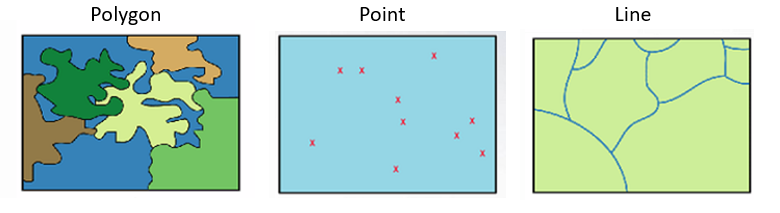

The shapefile, a interchangeably data format which are regulated by ESRI. It is one of the most common form of geospatial vector data used in GIS software and analyses. Three unique files are required for a shapefile, including: .shx (shape index format; this tags the shapefile with a position, so users can move it forward and backward among layers, a .shp (shape format, which stores geometric data, and a .dbf (attribute format file; which holds attributes (information) for the shapes in the file). 

## Polygon data

Polygons are two-dimensional geographical features covering a portion of the earth's surface, for example, forests, lakes, administrative boundaries, farmers' fields, or any other organizational unit the user defines. Polygons are important because their area and perimeter can be measured. Following example will how read ESRI polygon shape with four python libraries. We will use New York Sate County shape file (NY_County_GCS.shp). 

####  Using Geopandas

In [3]:
import geopandas as gpd

In [4]:
# Set filepath
fp_poly_gcs="Data_02/NY_County_GCS.shp"

In [5]:
# read polygoan files with Geopandas 
poly_gcs= gpd.GeoDataFrame.from_file(fp_poly_gcs)

In [6]:
# Check file type
type(poly_gcs)

geopandas.geodataframe.GeoDataFrame

In [7]:
# See data frame
poly_gcs.head()

,OBJECTID,ID,AREA,PERIMETER,COUNTYP020,STATE,COUNTY,FIPS,STATE_FIPS,SQUARE_MIL,Shape_Leng,Shape_Area,geometry
0,1,4770.0,0.000,0.140,1876.0,NY,Saint Lawrence County,36089,36,2756.532,11684.971307,3.916405e+06,"POLYGON ((-74.82161 45.00044, -74.82099 44.998..."
1,2,4771.0,0.330,2.472,1877.0,NY,Clinton County,36019,36,1117.664,229364.545100,2.901000e+09,"POLYGON ((-73.34179 44.54804, -73.36170 44.546..."
2,3,4774.0,0.808,3.890,1880.0,NY,Saint Lawrence County,36089,36,2756.532,357122.438069,7.141807e+09,"POLYGON ((-74.72688 44.99080, -74.71956 44.954..."
3,4,4778.0,0.496,3.252,1884.0,NY,Franklin County,36033,36,1686.726,313582.649176,4.377902e+09,"POLYGON ((-73.91242 44.43063, -74.06508 44.412..."
4,5,4783.0,0.000,0.114,1889.0,NY,Saint Lawrence County,36089,36,2756.532,9927.913795,3.088921e+06,"POLYGON ((-74.93221 44.96763, -74.93738 44.966..."


### Using   PyShp

In [8]:
import shapefile as shp
shape = shp.Reader(fp_poly_gcs)

###  Using Fiona

In [9]:
import fiona
shape = fiona.open("Data_02/NY_County_GCS.shp")
print (shape.schema)

{'properties': OrderedDict([('OBJECTID', 'str:80'), ('ID', 'float:24.15'), ('AREA', 'float:24.15'), ('PERIMETER', 'float:24.15'), ('COUNTYP020', 'float:24.15'), ('STATE', 'str:80'), ('COUNTY', 'str:80'), ('FIPS', 'str:80'), ('STATE_FIPS', 'str:80'), ('SQUARE_MIL', 'float:24.15'), ('Shape_Leng', 'float:24.15'), ('Shape_Area', 'float:24.15')]), 'geometry': 'Polygon'}


In [10]:
#first feature of the shapefile
first = shape.next()
print (first) 

{'type': 'Feature', 'id': '0', 'properties': OrderedDict([('OBJECTID', '1'), ('ID', 4770.0), ('AREA', 0.0), ('PERIMETER', 0.14), ('COUNTYP020', 1876.0), ('STATE', 'NY'), ('COUNTY', 'Saint Lawrence County'), ('FIPS', '36089'), ('STATE_FIPS', '36'), ('SQUARE_MIL', 2756.532), ('Shape_Leng', 11684.9713067), ('Shape_Area', 3916405.07346)]), 'geometry': {'type': 'Polygon', 'coordinates': [[(-74.82161151067312, 45.00044007941391), (-74.82098589942154, 44.998155074755665), (-74.82487689179268, 44.99634690862989), (-74.8274479992576, 44.99727387945654), (-74.83063708691292, 45.0004858550029), (-74.83772479714933, 45.001435715255646), (-74.8519536222948, 44.99876542598173), (-74.86488544973763, 44.99562592831123), (-74.8655034317208, 44.998368696749864), (-74.8545094698073, 45.00105424411329), (-74.85190784569917, 45.00332398965943), (-74.84346973336922, 45.008305985566864), (-74.83440601008554, 45.011002977276995), (-74.82731067062086, 45.01096864557287), (-74.82279406810939, 45.01094575700259)

E:\PyGeo\lib\site-packages\ipykernel_launcher.py:2: FionaDeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
  


####  Osgeo- GDAL 

In [11]:
from osgeo import ogr
file = ogr.Open(fp_poly_gcs)
shape = file.GetLayer(0)
print(shape)

<osgeo.ogr.Layer; proxy of <Swig Object of type 'OGRLayerShadow *' at 0x0000029C572F18D0> >


### Visiualization of Vector Map

In [12]:
#%matplotlib inline
import os
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
from mpl_toolkits.axes_grid1 import make_axes_locatable

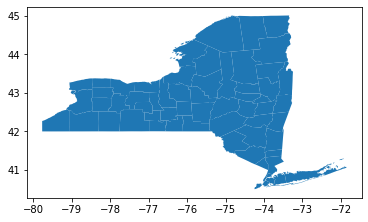

In [13]:
# Import NY Ctate County Shape file 
poly_gcs.plot()

In [14]:
### Change color of map
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['grey'])

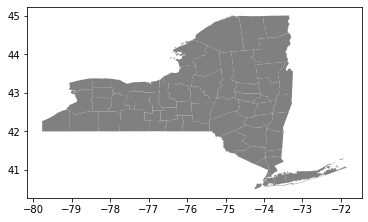

In [15]:
poly_gcs.plot(cmap=cmap)

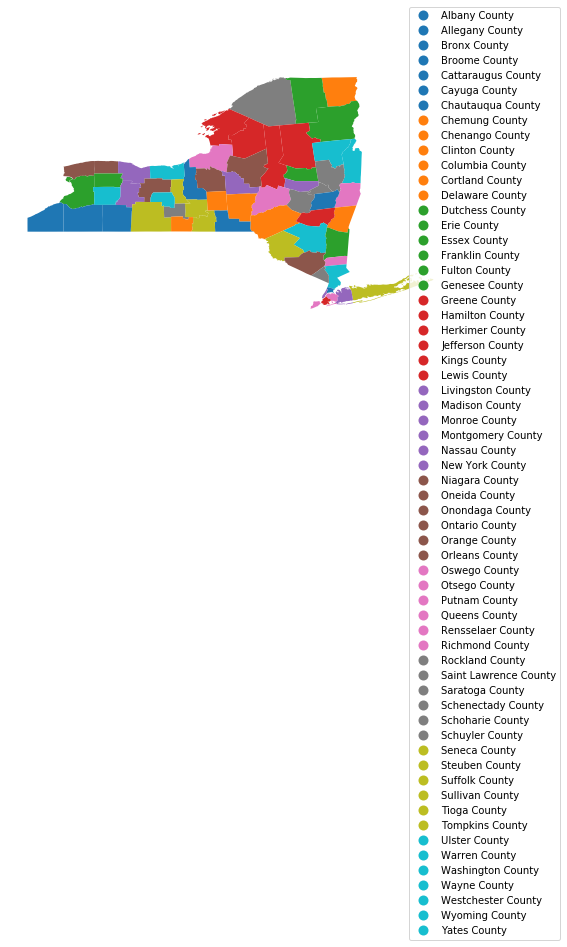

In [16]:
## Plot catgorical data
fig, ax = plt.subplots(figsize=(8, 8))
poly_gcs.plot(column='COUNTY',
                categorical=True,
                legend=True,
                ax=ax)

# adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.25,1.25))
ax.set_axis_off()
plt.show()

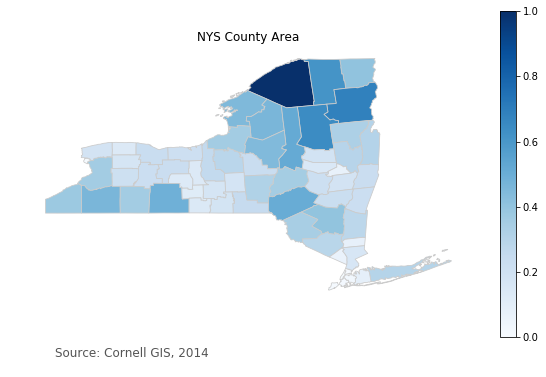

In [17]:
## Plot Continues
# set a variable that will call whatever column we want to visualise on the map
variable = 'AREA'
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
# create map
poly_gcs.plot(column=variable, 
              cmap='Blues', 
              linewidth=0.8, 
              ax=ax, 
              edgecolor='0.8')
# remove the axis
ax.axis('off')
# add a title
ax.set_title('NYS County Area')
# create an annotation for the data source
ax.annotate('Source: Cornell GIS, 2014',
            xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues')
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

##  Lines or Polylines

One-dimensional lines, also called polylines, are used to represent geographical features like rivers, roads, railroads, trails, and topographic lines. Note that these features are linear in nature and do not have area like polygons. Hence, they can measure distance. In this exercise we use road network maps of Onondaga county, New York State. 

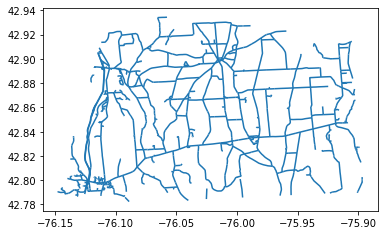

In [18]:
# Load road shape file
fp_road_gcs="Data_02/Ononda_Street_GCS.shp"
road_gcs= gpd.read_file(fp_road_gcs)
road_gcs.plot()

In [19]:
# See data frame
road_gcs.head()

,ID,StreetName,HighwayNum,Types,Label,TypeI,geometry
0,1,Highbridge,153,Road,Road,2,"LINESTRING (-75.90097 42.78962, -75.90055 42.7..."
1,2,Highland Park,None,Road,Road,2,"LINESTRING (-75.92192 42.79006, -75.92168 42.7..."
2,3,Highland Park,None,Road,Road,2,"LINESTRING (-75.92168 42.79012, -75.92069 42.7..."
3,4,Highland Park,None,Road,Road,2,"LINESTRING (-75.91374 42.79439, -75.91382 42.7..."
4,5,Highland Park,None,Road,Road,2,"LINESTRING (-75.91370 42.79410, -75.91374 42.7..."


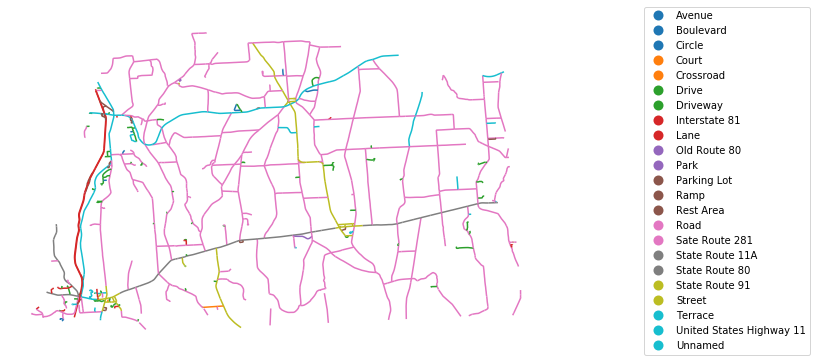

In [20]:
## Plot road
fig, ax = plt.subplots(figsize=(14, 6))
road_gcs.plot(column='Types',
                categorical=True,
                legend=True,
                ax=ax)

# adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.5,1.05))
ax.set_axis_off()

plt.show()

## Point data

Zero-dimensional points are important for geographical features like wells, soil-sampling locations that can be best expressed by a single reference point. Often point vector data consist off several points into a multi-point structure, with a single attribute record. For example, all the soil sampling points could be considered as a single geometry. The main drawback of a point feature, however, are that they cannot be used to make measurements (as you can with a polygon).

We used 650 soil samples from Colorado, Kansas, New Mexico, and Wyoming. These samples were collected by the United States Geological Survey (USGS) as a part of the USGS Geo-chemical Landscapes Project [Smith et al., 2011]. We will use shapefile() or readOGR() to read this vector data.

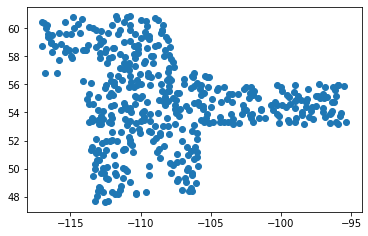

In [21]:
# Load point shape file
fp_point_gcs="Data_02/GP_Point_GCS.shp"
point_gcs= gpd.read_file(fp_point_gcs)
point_gcs.plot()

In [22]:
point_gcs.head()

,ID,Longitude,Latitude,STATE_ID,STATE,FIPS,COUNTY,SOC,geometry
0,1,-111.011860,41.056300,56,Wyoming,56041,Uinta County,15.763,POINT (-116.81245 56.80307)
1,2,-110.982973,42.883497,56,Wyoming,56023,Lincoln County,15.883,POINT (-117.00409 58.70413)
2,3,-110.806490,44.534970,56,Wyoming,56039,Teton County,18.142,POINT (-116.99014 60.45403)
3,4,-110.734417,44.432886,56,Wyoming,56039,Teton County,10.745,POINT (-116.87875 60.34872)
4,6,-110.661850,44.091240,56,Wyoming,56039,Teton County,16.987,POINT (-116.73421 59.98961)


### Write Vector Data

GeoDataFrames can be exported to many different standard formats using the GeoDataFrame.to_file() method. For a full list of supported formats, type import fiona; fiona.supported_drivers.

#### Writing to Shapefile:

In [23]:
# poly_gcs.to_file(Data_02/NY_County.shp")

#### Writing to GeoJSON:

In [24]:
# poly_gcs.to_file("Data_02/NY_County_geo", driver='GeoJSON')

# Raster Data

Unlike vector data, a raster data consists of cells or pixels organized into rows and columns as a matrix where each cell contains a value representing geographical feature on the earth. The size of the area on the surface that each pixel covers is known as the spatial resolution of the image. For instance, an image that has a 1 m spatial resolution means that each pixel in the image represents a 1 m x 1 m area. There are two types of raster data: continuous and discrete.  An example of discrete raster data is Land use raster.  Data types are flexible, including discrete and categorical data, such as soil or land-use maps, or continuous data as in digital elevation models, precipitation gradient maps, or pollutant concentration maps, etc. 

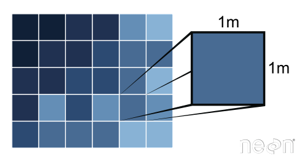

Generally, two types of raster use in GIS and remote sensing application:  **a single band**, or layer measure of a single characteristic of spatial area and **multiple bands** raster contains multiple spatially corresponding matrices of cell values representing the same spatial area.  An example of a single-band raster data set is a digital elevation model (DEM). Each cell in a DEM contains only one value representing elevation of earth surface. Most satellite imagery has multiple bands, typically containing values within band of the electromagnetic spectrum.

In this exercise, we will use SRTM 90 Digital Elevation Model of Onondaga County, New York State which was downloaded from [CGIAR-CSI](http://www.cgiar-csi.org/data/srtm-90m-digital-elevation-database-v4-1).  

## Single Band Raster

In this exercise, we will use SRTM 90 Digital Elevation Model of Onondaga County, New York State which was downloaded from C[CGIAR-CSI](http://www.cgiar-csi.org/data/srtm-90m-digital-elevation-database-v4-1). We will **rasterio** packaged open and visualization raster in Python

###  Open With Rasterio

In [25]:
import rasterio as rio
from rasterio.plot import show
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [26]:
dem_path = "Data_02/Onondaga_DEM.tif"

In [27]:
dem=rio.open(dem_path)

In [28]:
#number of raster columns
dem.width

534

In [29]:
#number of raster bands
dem.count

1

In [30]:
#number of raster rows
dem.height

443

In [31]:
# All Metadata for the whole raster dataset
dem.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.4028230607370965e+38,
 'width': 534,
 'height': 443,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.0011330640324679006, 0.0, -76.50012580544984,
        0.0, -0.00113306403246791, 43.27333404698799)}

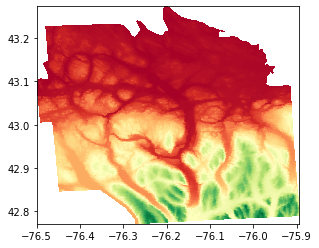

In [32]:
show(dem,cmap='RdYlGn')

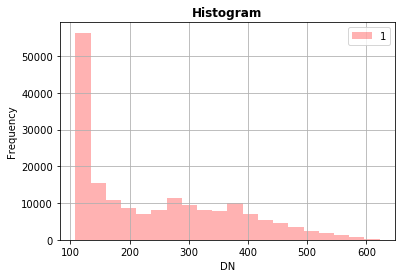

In [33]:
from rasterio.plot import show_hist
show_hist(dem, bins=20, lw=0.0, stacked=False, alpha=0.3,
        histtype='stepfilled', title="Histogram")

### Open GDAL

You can also open a raster layer with **gdal**

In [34]:
from osgeo import gdal
raster = gdal.Open(dem_path)

In [35]:
# Check type of the variable 'raster'
type(raster)

osgeo.gdal.Dataset

In [36]:
# Projection
raster.GetProjection()

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]]'

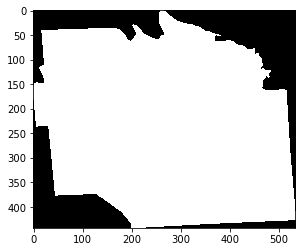

In [37]:
data = raster.GetRasterBand(1).ReadAsArray()
plt.imshow(data,cmap='gray')
plt.show()

### Write raster data

### Rasterio

We can export a raster file in python using the **rasterio write()** function. 

Use **rio.open()** to create a new blank raster ‘template’. Then write the DEM  numpy array to to that template using **dst.write()**.

In [38]:
outTIF= "Data_02/Onondaga_DEM_NEW.tif"
dem_meta=dem.profile 
with rio.open(outTIF, 'w', **dem_meta) as dst:
    dst.write(dem.read(1), 1)

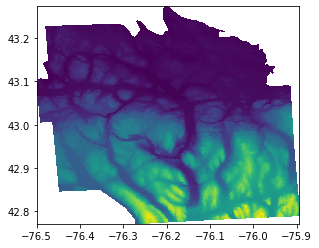

In [39]:
src = rio.open("Data_02/Onondaga_DEM_NEW.tif")
show(src)

### GDAL

Now we will how to write raster with GDAL driver. We will write a method to save the data in a format provided by the user. The procedure is fairly straightforward: we get a handler to a driver (e.g. a GeoTIFF or Erdas Imagine format), we create the output file (giving a filename, number of rows, columns, bands, the data type), and then add the relevant metadata (projection, geotransform, ...). We then select a band from the output and copy the array that we want to write to that band. 

In [40]:
import gdal # 
g = gdal.Open ("Data_02/Onondaga_DEM_NEW.tif" ) 

In [41]:
g.GetProjection()

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]]'

In [42]:
# Get the x, y and number of bands from the original file
x_size, y_size, n_bands = g.RasterXSize, g.RasterYSize, g.RasterCount
data = g.ReadAsArray ()
# Get a handler to a driver
driver = gdal.GetDriverByName ( "HFA" )

In [43]:
# Next line creates the output dataset with
# 1. The filename ("Onondaga_DEM.img")
# 2. The raster size (x_size, y_size)
# 3. The number of bands
# 4.The data type (in this case, Byte.
#  Other typical values might be gdal.GDT_Int16 
#  or gdal.GDT_Float32)
dataset_out = driver.Create( "Data_02/Onondaga_DEM_gdal.img", x_size, y_size, n_bands, \
                             gdal.GDT_Byte )

In [44]:
# Set the output geotransform by reading the input one
dataset_out.SetGeoTransform ( g.GetGeoTransform() )
# Set the output projection by reading the input one
dataset_out.SetProjection ( g.GetProjectionRef() )
# Now, get band # 1, and write our data array. 
# Note that the data array needs to have the same type
# as the one specified for dataset_out
dataset_out.GetRasterBand ( 1 ).WriteArray ( data )
# This bit forces GDAL to close the file and write to it
dataset_out = None

In [45]:
!gdalinfo "Data_02/Onondaga_DEM_gdal.img"

Driver: HFA/Erdas Imagine Images (.img)
Files: Data_02/Onondaga_DEM_gdal.img
Size is 534, 443
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        TOWGS84[0,0,0,-0,-0,-0,0],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]
Origin = (-76.500125805449841,43.273334046987991)
Pixel Size = (0.001133064032468,-0.001133064032468)
Corner Coordinates:
Upper Left  ( -76.5001258,  43.2733340) ( 76d30' 0.45"W, 43d16'24.00"N)
Lower Left  ( -76.5001258,  42.7713867) ( 76d30' 0.45"W, 42d46'16.99"N)
Upper Right ( -75.8950696,  43.2733340) ( 75d53'42.25"W, 43d16'24.00"N)
Lower Right ( -75.8950696,  42.7713867) ( 75d53'42.25"W, 42d46'16.99"N)
Center      ( -76.1975977,  43.0223604) ( 76d11'51.35"W, 43d 1'20.50"N)
Band 1 Block=64x64 Type=Byte, ColorInterp

## Multi Band Raster

For loading multi-bands image in Python, we will use a sub-set of Landsat 8 multispectral image covering Onondaga county of New York state. This image was downloaded from [USGS Earth Explore]( http://earthexplorer.usgs.gov/ ). 

In [46]:
b2="Data_02/LC08_20150706_subset/LC08_L1TP_015030_20150716_20170226_01_T1_B2.TIF"
b3="Data_02/LC08_20150706_subset/LC08_L1TP_015030_20150716_20170226_01_T1_B3.TIF"
b4="Data_02/LC08_20150706_subset/LC08_L1TP_015030_20150716_20170226_01_T1_B4.TIF"
b5="Data_02/LC08_20150706_subset/LC08_L1TP_015030_20150716_20170226_01_T1_B5.TIF"

In [47]:
b2_r=rasterio.open(b2)
b3_r=rasterio.open(b3)
b4_r=rasterio.open(b4)
b5_r=rasterio.open(b5)

NameError: name 'rasterio' is not defined

In [ ]:
# Initialize subplots
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(10, 4), sharey=True)

# Plot 4 bands
show(b2_r, ax=ax1)
show(b3_r, ax=ax2)
show(b4_r, ax=ax3)
show(b5_r, ax=ax4)

# Add titles
ax1.set_title("Band-2")
ax2.set_title("Band-3")
ax3.set_title("Band-4")
ax4.set_title("Band-5")


### Stack Multi Band Imagery

Some remote sensing datasets are stored with each band in a separate file. However, often you want to use all of the bands together in your analysis. For example you need all of the bands together in the same file or “stack” in order to plot a color RGB image. EarthPy has a stack() function that allows you to take a set of .tif files that are all in the same spatial extent, CRS and resolution and either export them together a single stacked .tif file or work with them in Python directly as a stacked numpy array.

To begin using the EarthPy stack() function, import the needed packages and create an array to be plotted. Below you plot the data as continuous with a colorbar using the plot_bands() function.

In [ ]:
import os
import numpy as np
# File manipulation
from glob import glob
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

You will use the *glob* function see the files in landsat data directory

In [ ]:
glob ("Data_02/LC08_20150706_subset/*")

Now we will create a list for band (2,3,4 and 5)

In [ ]:
multi_bands=glob( "Data_02/LC08_20150706_subset/*B[2:3:4:5]*.tif")
multi_bands

Now you have a list of all of the landsat bands in your landsat collections folder. You could chose to open each file individually using the **rio.open** (rasterio library) function.

Remember that Python uses 0 based indexing so band 3 is actually at index [2] not [3].

In [ ]:
# Open a single band (NIR) and plot
with rio.open(multi_bands[3]) as src:
    landsat_band4 = src.read()

ep.plot_bands(landsat_band4[0],
              title="Landsat NIR (Band-5)",
              scale=False)
plt.show()

### Crerate Raster stack

In [ ]:
landsat_multi_path = "Data_02/LC08_20150706_subset/landsat_multi.tif"
# This will create a new stacked raster with all bands save as landsat_multi.tif
land_stack, land_meta = es.stack(multi_bands,
                                 landsat_multi_path)

Once we have stacked 4 bands, we can import it and work with it as we need to!

In [ ]:
with rio.open(landsat_multi_path) as src:
    landsat_multi = src.read()
    

In [ ]:
# Plot all bands using earthpy
band_titles = ["Blue", "Green", "Red", "NIR"]
ep.plot_bands(landsat_multi,
              title=band_titles, cbar=False)
plt.show()

#### Sources:

https://geohackweek.github.io/raster/04-workingwithrasters/ https://www.earthdatascience.org/workshops/gis-open-source-python/subtract-rasters-in-open-source-python/ https://www.e-education.psu.edu/geog489/node/2215 https://www.earthdatascience.org/courses/earth-analytics-python/lidar-raster-data/customize-matplotlib-raster-maps/ https://pcjericks.github.io/py-gdalogr-cookbook/raster_layers.html https://automating-gis-processes.github.io/2016/Lesson7-read-raster.html https://www.neonscience.org/plot-neon-rgb-py https://automating-gis-processes.github.io/CSC/notebooks/L5/plotting-raster.html https://www.earthdatascience.org/courses/earth-analytics-python/multispectral-remote-sensing-in-python/naip-imagery-raster-stacks-in-python/ 